In [2]:
import boto3
import pickle
import pandas as pd
from io import StringIO
import io

!pip install gensim
from gensim.models.word2vec import Word2Vec
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree
import numpy as np

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [12]:
s3 = boto3.client('s3')

object = s3.get_object(Bucket='inroads-test-bucket1',Key='data/Vectorized/inroads_vectorized.csv')
inroads_vectorized = pd.read_csv(io.BytesIO(object['Body'].read()), encoding='utf8', index_col=0)

inroads_vectorized=inroads_vectorized.rename(columns = {'tokens':'token'})

inroads_vectorized.shape

(10061, 302)

In [4]:
s3 = boto3.client('s3')

object = s3.get_object(Bucket='inroads-test-bucket1',Key='data/Vectorized/old_vectorized.csv')
old_vectorized = pd.read_csv(io.BytesIO(object['Body'].read()), encoding='utf8', index_col=0)

old_vectorized.shape

(941, 302)

In [13]:
inroads_vectorized.columns

Index(['token', 'vector', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [6]:
## extract details

In [8]:
def Convert(string): 
    li = list(string.split(" ")) 
    return li

In [ ]:
## old data

In [18]:
old_vocab = list()

for i in range(0,len(old_vectorized)):
    test = old_vectorized.iloc[i].token
    old_vocab.append(test)

old_vocab_df = pd.DataFrame(old_vocab, columns=["token"])

In [90]:
old_vectors_2 = list()

for i in range(0,len(old_vectorized)):
    test = old_vectorized.iloc[i].vector
    test_2 = str(test)[1:-1] 
    test_2 = Convert(test_2)
    while("" in test_2) : 
        test_2.remove("")
    test_2 = list(map(lambda s: s.strip(), test_2))
    test_2 = np.array(test_2)
    old_vectors_2.append(test_2)

In [148]:
old_array = np.array(old_vectors_2)

In [149]:
old_vectors_df_2 = old_vectorized.drop(['token','vector'], axis=1)
old_vectors_df_2.head

<bound method NDFrame.head of             0         1         2         3         4         5         6  \
0    0.009340 -0.011540 -0.005011  0.170543 -0.070042 -0.022673  0.035479   
1    0.073121 -0.047603  0.091147  0.162190 -0.052149 -0.108441 -0.028311   
2    0.013254  0.050222 -0.089445  0.083483 -0.044747 -0.065899  0.019941   
3    0.017232 -0.138262 -0.069550  0.161501 -0.024385 -0.121781 -0.035268   
4   -0.056970  0.020302 -0.024677 -0.048865  0.064803 -0.033035 -0.029016   
..        ...       ...       ...       ...       ...       ...       ...   
936 -0.021196 -0.011311 -0.073023  0.030679  0.117935  0.040947  0.024909   
937 -0.028905  0.093232 -0.058349 -0.013379 -0.086675  0.104365  0.064961   
938 -0.074280  0.093354 -0.145046  0.006174  0.000712  0.073791  0.088202   
939 -0.045976 -0.006391 -0.056196 -0.057425 -0.018857 -0.025275  0.079501   
940  0.014605  0.167768 -0.082776 -0.017683 -0.045675  0.065280  0.051255   

            7         8         9  ...       

In [ ]:
## inroads data

In [15]:
inroads_vocab = list()

for i in range(0,len(inroads_vectorized)):
    test = inroads_vectorized.iloc[i].token
    inroads_vocab.append(test)

inroads_vocab_df = pd.DataFrame(inroads_vocab, columns=["token"])

In [16]:
inroads_vectors_2 = list()

for i in range(0,len(inroads_vectorized)):
    test = inroads_vectorized.iloc[i].vector
    test_2 = str(test)[1:-1] 
    test_2 = Convert(test_2)
    while("" in test_2) : 
        test_2.remove("")
    test_2 = list(map(lambda s: s.strip(), test_2))
    test_2 = np.array(test_2)
    inroads_vectors_2.append(test_2)

In [17]:
import numpy as np
inroads_array = np.array(inroads_vectors_2)

In [19]:
inroads_vectors_df_2 = inroads_vectorized.drop(['token','vector'], axis=1)
inroads_vectors_df_2.head

<bound method NDFrame.head of               0         1         2         3         4         5         6  \
0      0.188549 -0.051055 -0.051035  0.012129  0.018650 -0.108756 -0.054335   
1     -0.089151 -0.032444  0.066067 -0.083048 -0.025339 -0.115493 -0.082126   
2      0.080989  0.071457 -0.036697  0.051603 -0.098144 -0.004233  0.047631   
3      0.048181 -0.024815 -0.042576  0.044887 -0.072843 -0.014483 -0.092501   
4     -0.002084  0.084489  0.014706  0.073587 -0.098434 -0.009841 -0.012736   
...         ...       ...       ...       ...       ...       ...       ...   
10056 -0.014218 -0.024084  0.081345 -0.069396 -0.051680  0.006385 -0.056575   
10057 -0.073358 -0.063885  0.057451 -0.059011 -0.102870  0.027484 -0.090268   
10058 -0.082558  0.043012 -0.118982 -0.168650  0.035012  0.004704  0.010404   
10059  0.010403 -0.001597  0.022658  0.142871  0.002488 -0.039659 -0.024233   
10060  0.013340  0.024281 -0.089154  0.055416  0.031318  0.012631  0.109731   

              7      

In [56]:
frames = [old_vectorized, inroads_vectorized]

combined_vectorized = pd.concat(frames)
combined_vectorized = combined_vectorized.drop_duplicates()

In [ ]:
## combined data

In [57]:
combined_vocab = list()

for i in range(0,len(combined_vectorized)):
    test = combined_vectorized.iloc[i].token
    combined_vocab.append(test)

combined_vocab_df = pd.DataFrame(combined_vocab, columns=["token"])

In [58]:
combined_vectors_2 = list()

for i in range(0,len(combined_vectorized)):
    test = combined_vectorized.iloc[i].vector
    test_2 = str(test)[1:-1] 
    test_2 = Convert(test_2)
    while("" in test_2) : 
        test_2.remove("")
    test_2 = list(map(lambda s: s.strip(), test_2))
    test_2 = np.array(test_2)
    combined_vectors_2.append(test_2)

In [59]:
import numpy as np
combined_array = np.array(combined_vectors_2)

In [60]:
combined_vectors_df_2 = combined_vectorized.drop(['token','vector'], axis=1)
combined_vectors_df_2.head

<bound method NDFrame.head of               0         1         2         3         4         5         6  \
0      0.009340 -0.011540 -0.005011  0.170543 -0.070042 -0.022673  0.035479   
1      0.073121 -0.047603  0.091147  0.162190 -0.052149 -0.108441 -0.028311   
2      0.013254  0.050222 -0.089445  0.083483 -0.044747 -0.065899  0.019941   
3      0.017232 -0.138262 -0.069550  0.161501 -0.024385 -0.121781 -0.035268   
4     -0.056970  0.020302 -0.024677 -0.048865  0.064803 -0.033035 -0.029016   
...         ...       ...       ...       ...       ...       ...       ...   
10056 -0.014218 -0.024084  0.081345 -0.069396 -0.051680  0.006385 -0.056575   
10057 -0.073358 -0.063885  0.057451 -0.059011 -0.102870  0.027484 -0.090268   
10058 -0.082558  0.043012 -0.118982 -0.168650  0.035012  0.004704  0.010404   
10059  0.010403 -0.001597  0.022658  0.142871  0.002488 -0.039659 -0.024233   
10060  0.013340  0.024281 -0.089154  0.055416  0.031318  0.012631  0.109731   

              7      

In [75]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++', random_state = 1);
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering, kmeans_clustering.cluster_centers_, idx;

In [76]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df, tree;

In [77]:
kmodel,centers,clusters = clustering_on_wordvecs(combined_vectors_2, 9);
centroid_map = dict(zip(combined_vocab, clusters));

In [78]:
predicted_cluster = {}

for i in range(0, len(combined_vectors_2)):
    word = combined_vocab[i]
    temp = kmodel.predict(combined_vectors_2[i].reshape(1,-1))[0]
    predicted_cluster.update({word:temp})

In [79]:
predicted_cluster

{'abstract': 1,
 'absence': 1,
 'abundance': 5,
 'reality': 5,
 'beautiful': 7,
 'complexity': 5,
 'creation': 5,
 'finality': 1,
 'truth': 2,
 'burial': 8,
 'life': 5,
 'complicate': 5,
 'natural': 5,
 'peace': 6,
 'universal': 1,
 'work': 5,
 'nuance': 5,
 'complex': 5,
 'vision': 5,
 'security': 1,
 'save': 1,
 'live': 2,
 'stable': 1,
 'option': 1,
 'limbo': 2,
 'circle': 0,
 'square': 7,
 'triangle': 7,
 'rectangle': 7,
 'sphere': 5,
 'blue': 7,
 'color': 0,
 'orange': 7,
 'yellow': 7,
 'green': 7,
 'purple': 7,
 'black': 5,
 'white': 6,
 'darkness': 7,
 'light': 0,
 'radiance': 7,
 'actor': 4,
 'entertainment': 0,
 'music': 0,
 'literature': 5,
 'performance': 0,
 'theater': 0,
 'drama': 0,
 'poetry': 0,
 'artist': 4,
 'band': 6,
 'musical': 0,
 'book': 0,
 'film': 0,
 'documentary': 0,
 'misinformation': 2,
 'advertisement': 0,
 'radio': 0,
 'silence': 2,
 'media': 5,
 'journalism': 0,
 'social': 5,
 'what': 5,
 'billboard': 7,
 'poster': 7,
 'flyer': 7,
 'talk': 2,
 'show': 5,


In [80]:
top_words,tree = get_top_words(combined_vocab, 20, centers, combined_array);
print(top_words)

      Cluster #0  Cluster #1    Cluster #2      Cluster #3 Cluster #4  \
1          https     justify          feel      principios     tobias   
2          texts      should       torment          tenido    spencer   
3         format     require      laughter    relacionadas   espacios   
4         poetry     enforce       terrify         abortos      heidi   
5         visual       limit         scary          nuevas     nephew   
6           film     protect    ridiculous          además     joanna   
7     multimedia   undermine         agony          siendo    ampliar   
8          zines        they      frighten       comunidad      annie   
9          audio        harm       sadness          tienen      reeve   
10       graphic    coercive        sorrow          grupos    actress   
11    commentary       allow         vomit            cómo      meyer   
12          text   therefore          love       continuar  catherine   
13      humorous     morally          weep         

In [ ]:
## sagemaker deploy

In [119]:
from sagemaker import get_execution_role
role = get_execution_role()

In [130]:
s3_client = boto3.client('s3')
bucket='inroads-test-bucket1'

In [134]:
old_vectors_df_2.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=300)

In [195]:
train_data = old_array.astype('float32')
new_data = combined_array.astype('float32')

In [211]:
from sagemaker import KMeans

num_clusters = 9
kmeans = KMeans(role=role,
                train_instance_count=1,
                train_instance_type='ml.c4.xlarge',
                output_path='s3://'+ bucket +'/kmeans/',              
                k=num_clusters)

In [212]:
%%time
kmeans.fit(kmeans.record_set(train_data))

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-08-20 23:21:41 Starting - Starting the training job...
2020-08-20 23:21:45 Starting - Launching requested ML instances.........
2020-08-20 23:23:24 Starting - Preparing the instances for training......
2020-08-20 23:24:40 Downloading - Downloading input data...
2020-08-20 23:25:02 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/20/2020 23:25:25 INFO 140513672755008] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', 

In [213]:
%%time
kmeans_predictor = kmeans.deploy(initial_instance_count=1, 
                                 instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-----------------!CPU times: user 296 ms, sys: 15.7 ms, total: 312 ms
Wall time: 8min 35s


In [214]:
%%time
result=kmeans_predictor.predict(new_data[:100])

CPU times: user 25.7 ms, sys: 26 µs, total: 25.7 ms
Wall time: 234 ms


In [215]:
cluster_labels = [r.label['closest_cluster'].float32_tensor.values[0] for r in result]

In [216]:
pd.DataFrame(cluster_labels)[0].value_counts()

1.0    35
5.0    26
4.0    13
2.0    10
6.0     9
3.0     4
8.0     2
7.0     1
Name: 0, dtype: int64

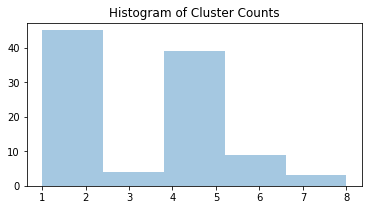

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

ax=plt.subplots(figsize=(6,3))
ax=sns.distplot(cluster_labels, kde=False)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [218]:
import os

job_name = kmeans.latest_training_job.name
model_key = "kmeans/" + job_name + "/output/model.tar.gz"

boto3.resource('s3').Bucket(bucket).download_file(model_key, 'model.tar.gz')
os.system('tar -zxvf model.tar.gz')

0

In [219]:
!pip install mxnet
import mxnet as mx

Kmeans_model_params = mx.ndarray.load('model_algo-1')

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [ ]:
## REMEMBER TO CLOSE SESSION!

In [221]:
import sagemaker
sagemaker.Session().delete_endpoint(kmeans_predictor.endpoint)